<a href="https://colab.research.google.com/github/levchenkopavlo/AI/blob/master/%D0%94%D0%97_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [71]:
# df[df['fare']>500]
df

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


# Завдання
Проведіть аналіз даних пасажирів. Включіть

* аналіз числових ознак
* аналіз категоріальних ознак
* перевірку викидів

В результаті як коментар опишіть дані(що на що впливає\не впливає і як, можливо якихось даних надто мало і потрібно більше даних, тощо)

In [72]:
print(df.shape, end='\n\n')
print(df.columns, end='\n\n')
print(df.dtypes, end='\n\n')
print(df.isnull().sum(), end='\n\n')

(891, 7)

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'], dtype='object')

pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64



In [73]:
# перевірка на наявність порожніх значень

df.isnull().sum()

pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [74]:
# аналіз числових ознак

df.drop(columns=['pclass']).describe(include='number')

,age,sibsp,parch,fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [75]:
# аналіз категоріальних ознак (клас квитка не є числовою ознакою)

df['pclass'] = df['pclass'].astype('object')
df.describe(include='object')

,pclass,sex,embarked
count,891,891,889
unique,3,2,3
top,3,male,S
freq,491,577,644


In [76]:
# аналіз викидів
print('початкові розміри: ', df.shape)

num_df = df.select_dtypes(include='number')
q1 = num_df.quantile(q=0.25)
q3 = num_df.quantile(q=0.75)

IQR = q3 - q1
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR
mask = (num_df >= lower) & (num_df <= upper)

print('розміри датафрейму без викидів: ', df[mask.all(axis=1)].shape)
# df[mask.all(axis=1)].shape

початкові розміри:  (891, 7)
розміри датафрейму без викидів:  (449, 7)


<function matplotlib.pyplot.show(close=None, block=None)>

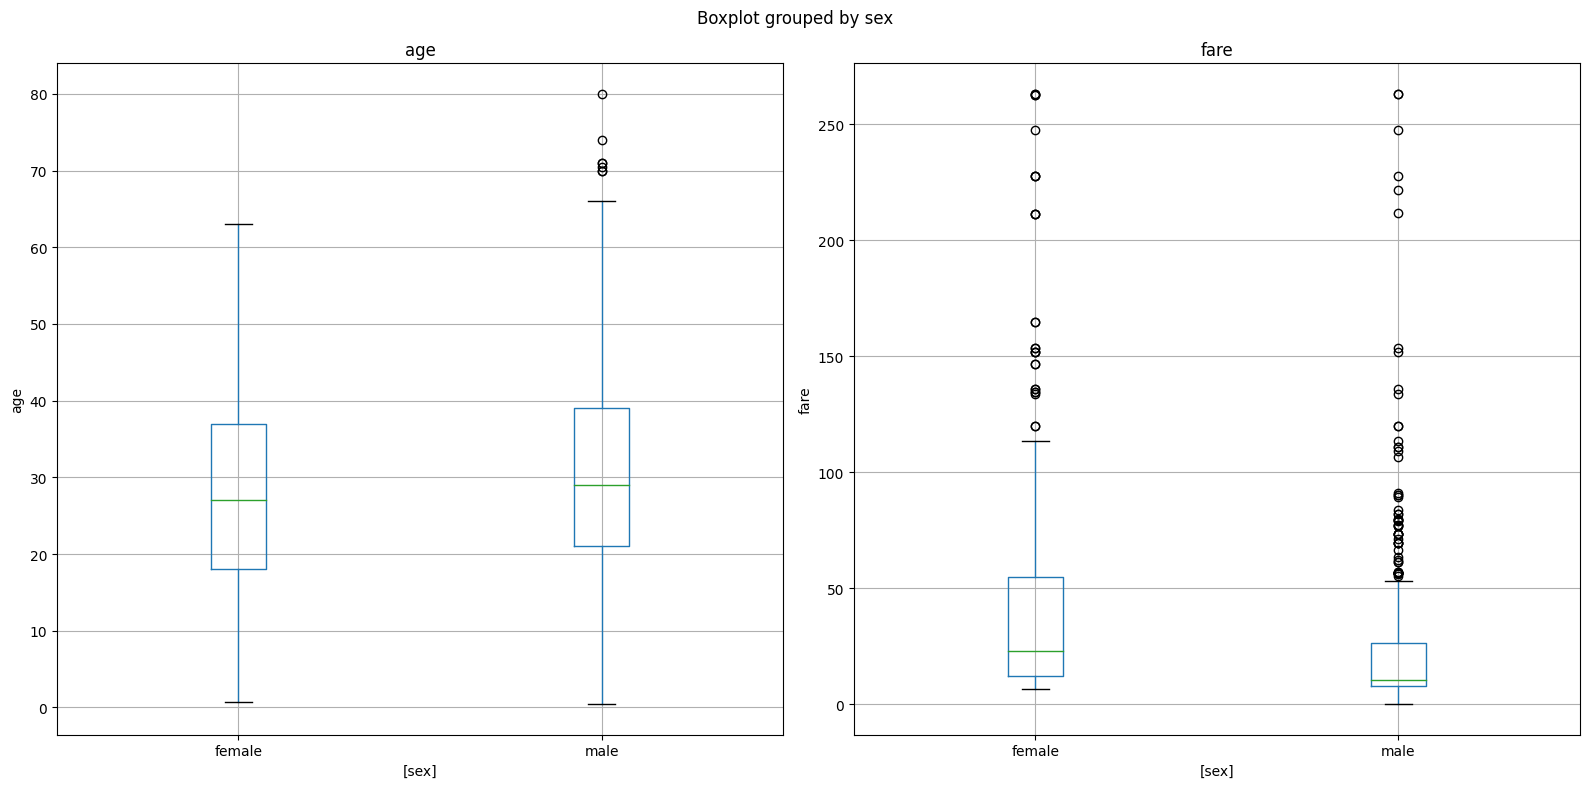

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

df[['age', 'sex']].boxplot(by='sex', ax=axes[0])
axes[0].set_ylabel('age')

# Вік чоловіків та жінок серед пасажирів є приблизно однаковим. Проте в таблиці відсутні дані про вік маже 20%, що не дозволяє провести детальний аналіз.

axes[1] = df[df['fare']<500][['fare', 'sex']].boxplot(by='sex', ax=axes[1])
axes[1].set_ylabel('fare')

plt.tight_layout()
plt.show

# з другого графіка видно, що жінки віддавали перевагу буль дорожчим квиткам.

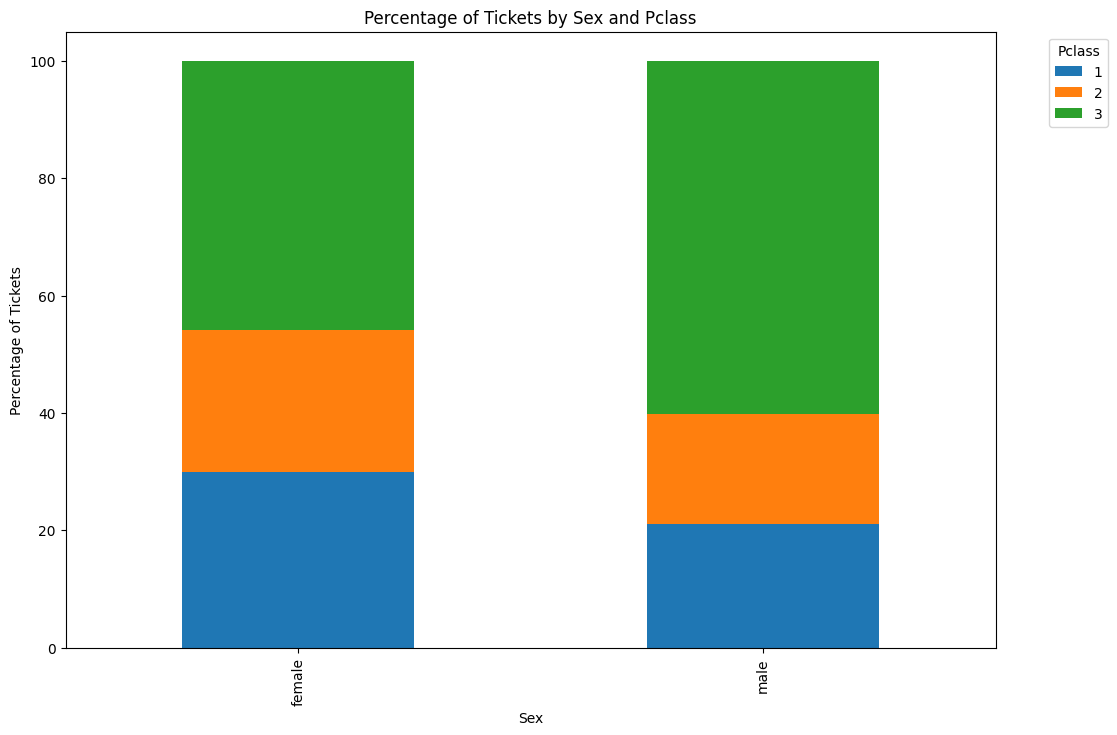

In [78]:
grouped = df.groupby(['sex', 'pclass']).size().unstack(fill_value=0)
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

grouped_percent.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Percentage of Tickets by Sex and Pclass')
plt.xlabel('Sex')
plt.ylabel('Percentage of Tickets')
plt.legend(title='Pclass', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

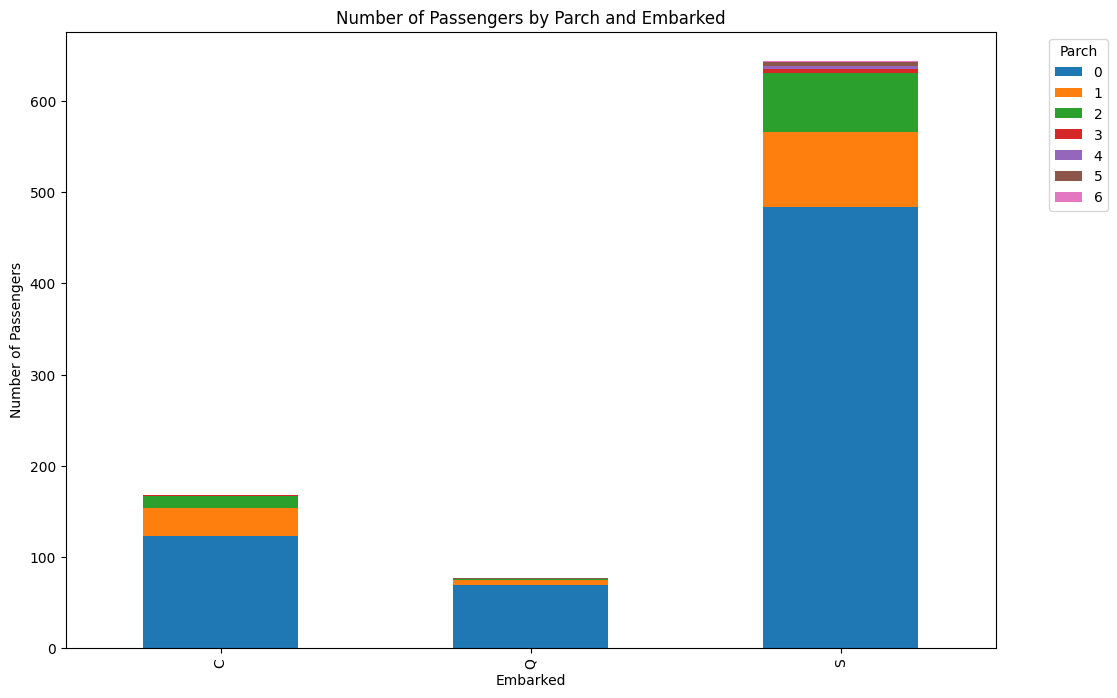

In [79]:
parch_embarked = df.groupby(['embarked', 'parch']).size().unstack(fill_value=0)

# Побудова візуалізації
parch_embarked.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Number of Passengers by Parch and Embarked')
plt.xlabel('Embarked')
plt.ylabel('Number of Passengers')
plt.legend(title='Parch', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Основна маса - пасажири без дітей

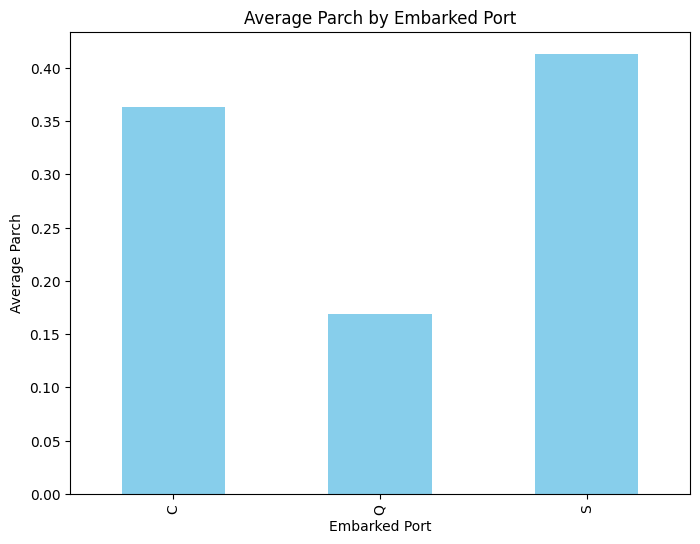

In [80]:
plt.figure(figsize=(8, 6))
df.groupby('embarked')['parch'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Parch by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Average Parch')

plt.show()

(array([1, 2, 3]), [Text(1, 0, 'C'), Text(2, 0, 'Q'), Text(3, 0, 'S')])

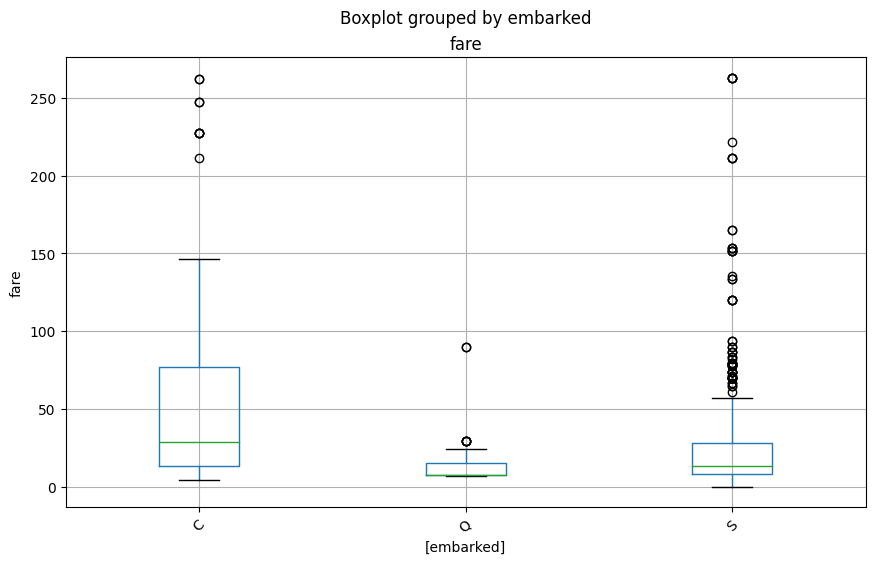

In [81]:
ax = df[df['fare']<500][['fare', 'embarked']].boxplot(by='embarked', figsize=(10,6))
ax.set_ylabel('fare')
plt.xticks(rotation=45)

# Викиди сильно перешкоджають аналізу. Як варіант, можна прибрати з аналізу квитки вартістю понад 500

(array([1, 2, 3]), [Text(1, 0, 'C'), Text(2, 0, 'Q'), Text(3, 0, 'S')])

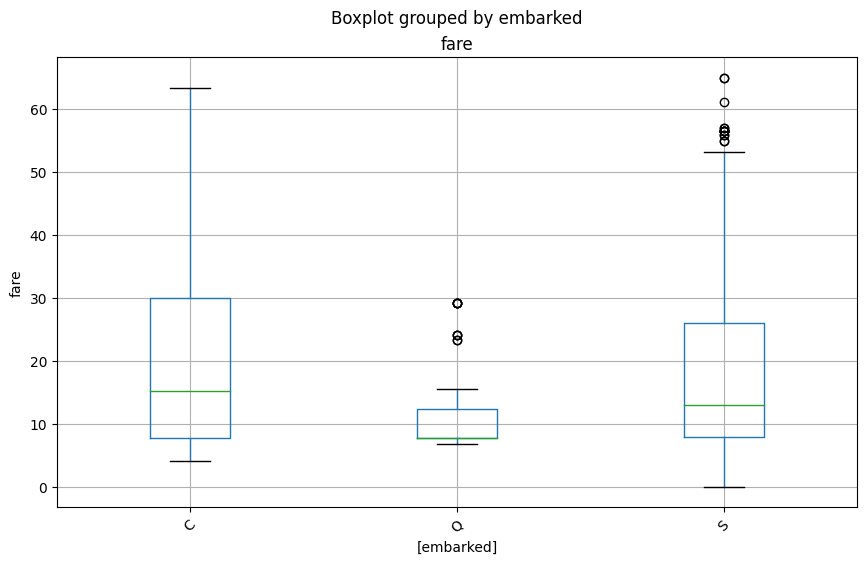

In [82]:
def remove_outliers(df, column_name):
  column = df[column_name]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)

  iqr = q3 - q1

  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr

  mask = (column >= lower) & (column <= upper)

  return df[mask]

ax = remove_outliers(df, 'fare')[['fare', 'embarked']].boxplot(by='embarked', figsize=(10,6))
ax.set_ylabel('fare')
plt.xticks(rotation=45)

# Після видалення викидів стає зрозумілим, що більшість квитків були найдешевшими в межах до 30, а в порту Q в основному до 12.
# В порту С квитки були дорожчими.

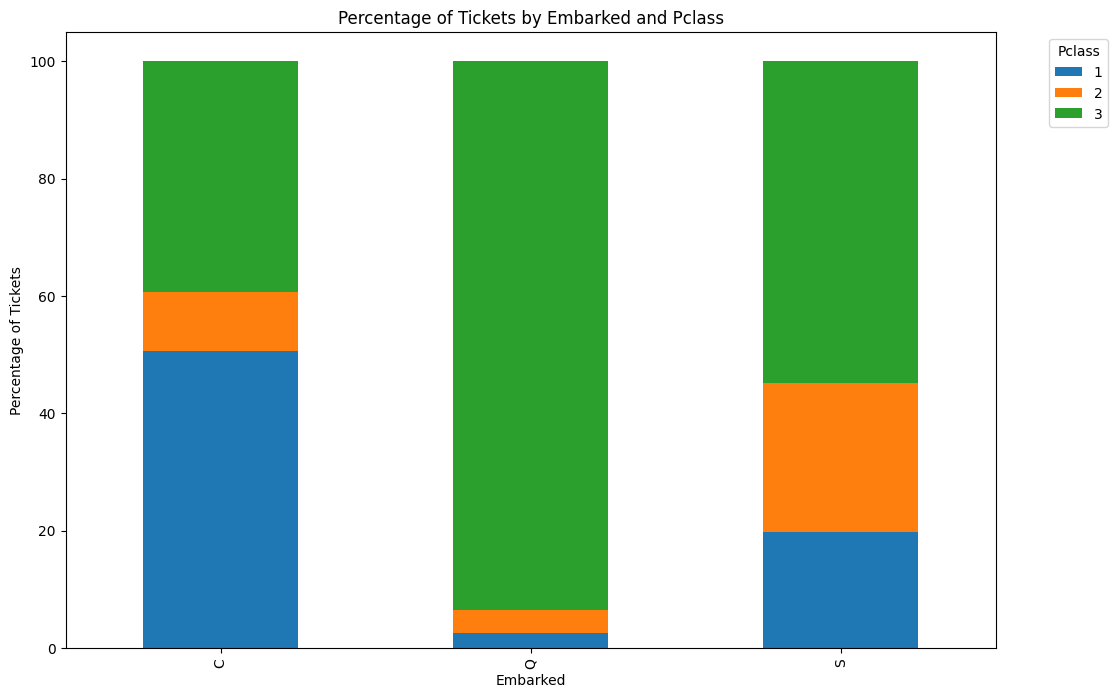

In [83]:
grouped = df.groupby(['embarked', 'pclass']).size().unstack(fill_value=0)
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

grouped_percent.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Percentage of Tickets by Embarked and Pclass')
plt.xlabel('Embarked')
plt.ylabel('Percentage of Tickets')
plt.legend(title='Pclass', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Можемо припустити, що регіон порту Q був досить бідним, на відміну від регіону порту С.

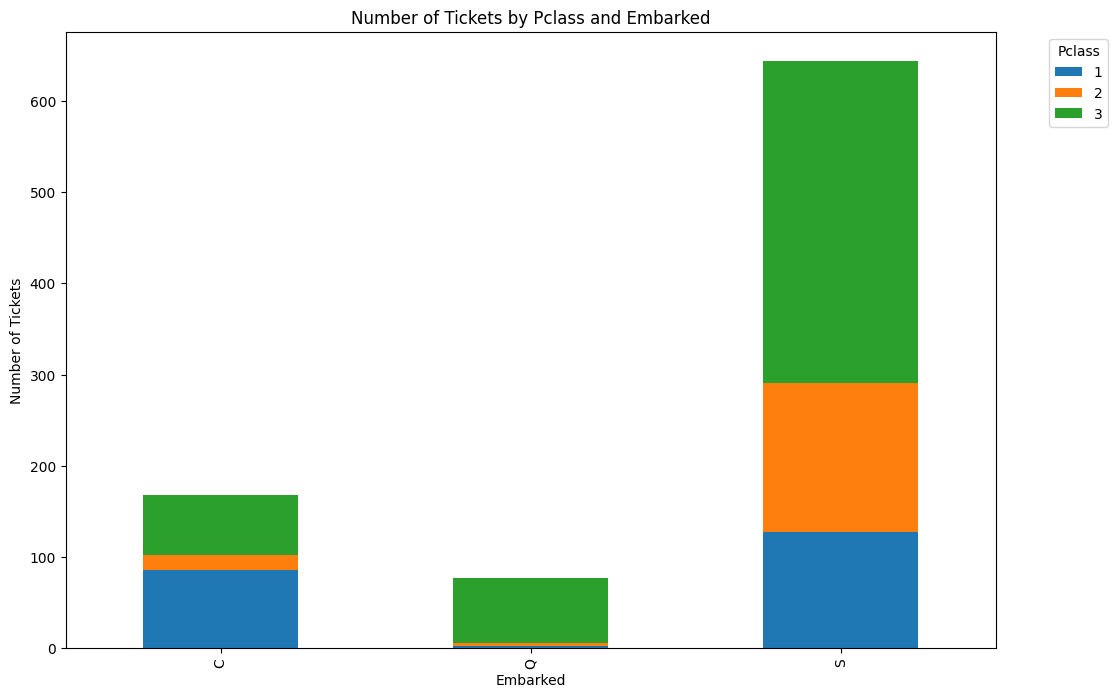

In [84]:
pclass_embarked = df.groupby(['embarked', 'pclass']).size().unstack(fill_value=0)

# Побудова візуалізації
pclass_embarked.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Number of Tickets by Pclass and Embarked')
plt.xlabel('Embarked')
plt.ylabel('Number of Tickets')
plt.legend(title='Pclass', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

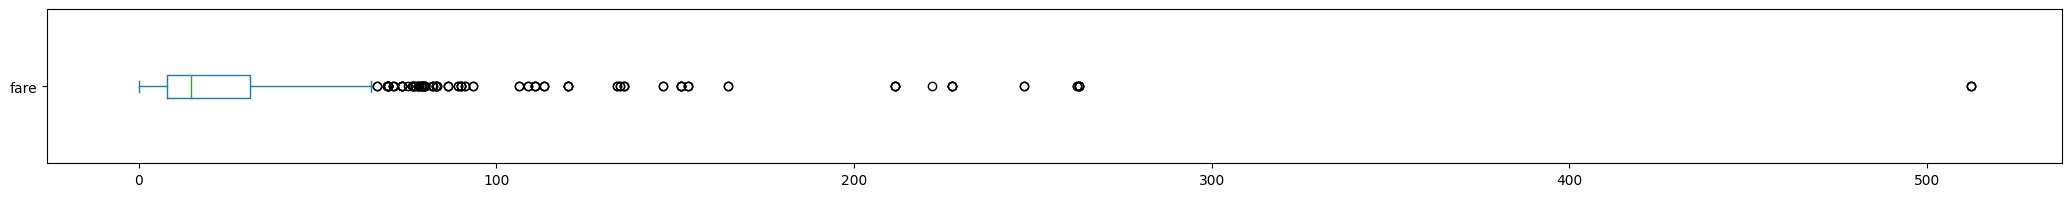

In [91]:
df['fare'].plot(kind='box', vert=False, figsize=(26,2))
plt.show()

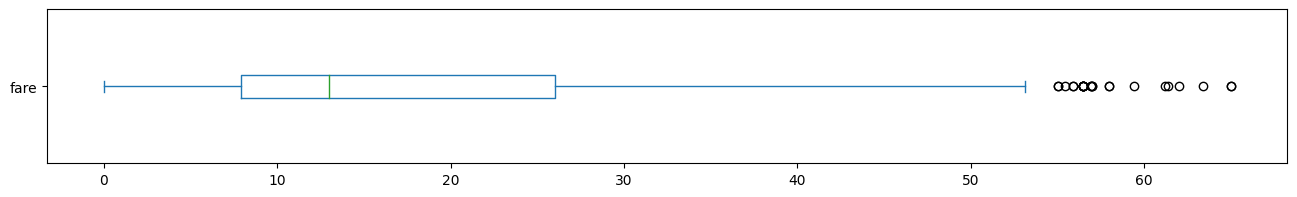

In [86]:
column_name = 'fare'
q1 = df[column_name].quantile(0.25)
q3 = df[column_name].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df[(df[column_name] >= lower) & (df[column_name] <= upper)][column_name].plot(kind='box', vert=False, figsize=(16,2))
plt.show()

In [87]:
df[df['fare'] > q3]['fare'].sum()

19686.4876

In [88]:
df[df['fare'] <= q3]['fare'].sum()

9007.4617

In [93]:
df[df['fare'] > 54]['fare'].sum()

16335.6498

In [ ]:
# Не зважаючи на те, що квитки були найдешевшими, в основному від 8 до 27, загальна вартість квитків у викидах майже в двічі перевищує вартість інших квитків.

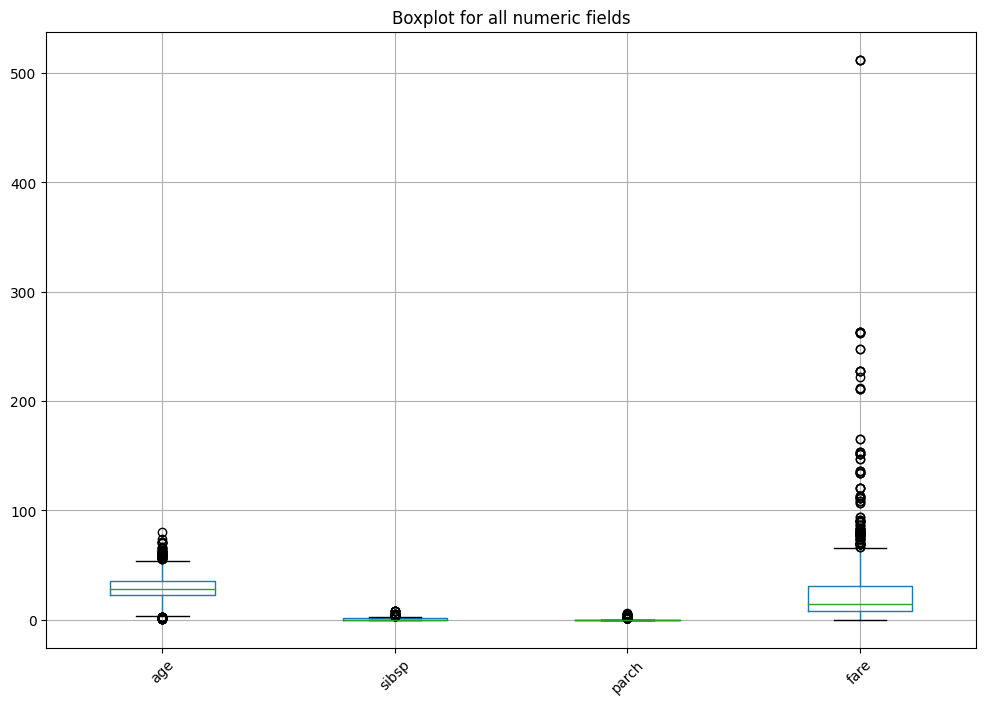

In [89]:
# Заміна пропущених значень
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Побудова boxplot для всіх числових полів
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 8))
df[numeric_cols].boxplot()
plt.title('Boxplot for all numeric fields')
plt.xticks(rotation=45)
plt.show()

In [90]:
num_df = df.drop(columns=['pclass']).describe(include='number')
corr = num_df.corr(method='pearson')

corr

,age,sibsp,parch,fare
age,1.000000,0.997662,0.997527,0.886796
sibsp,0.997662,1.000000,0.999998,0.858250
parch,0.997527,0.999998,1.000000,0.857221
fare,0.886796,0.858250,0.857221,1.000000
